In [ ]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

# load csv files into dataframes
jan = pd.read_csv('USS daily waiting time/download_universal-studios-singapore_jan_18521_2024_10_31_15_23_50.csv')
feb = pd.read_csv('USS daily waiting time/download_universal-studios-singapore_feb_18521_2024_10_31_15_23_46.csv')
mar = pd.read_csv('USS daily waiting time/download_universal-studios-singapore_mar_18521_2024_10_31_15_23_41.csv')
apr = pd.read_csv('USS daily waiting time/download_universal-studios-singapore_apr_18521_2024_10_31_15_23_37.csv')
may = pd.read_csv('USS daily waiting time/download_universal-studios-singapore_may_18521_2024_10_31_15_23_34.csv')
jun = pd.read_csv('USS daily waiting time/download_universal-studios-singapore_jun_18521_2024_10_31_15_37_28.csv')
jul = pd.read_csv('USS daily waiting time/download_universal-studios-singapore_jul_18521_2024_10_31_15_23_26.csv')
aug = pd.read_csv('USS daily waiting time/download_universal-studios-singapore_aug_18521_2024_10_31_15_23_21.csv')
sep = pd.read_csv('USS daily waiting time/download_universal-studios-singapore_sep_18521_2024_10_31_15_23_10.csv')
oct = pd.read_csv('USS daily waiting time/download_universal-studios-singapore_oct_18521_2024_10_31_15_23_05.csv')
nov = pd.read_csv('USS daily waiting time/download_universal-studios-singapore_nov_18521_2024_10_31_15_22_53.csv')
dec = pd.read_csv('USS daily waiting time/download_universal-studios-singapore_dec_18521_2024_10_31_14_44_27.csv')

list_of_df = [jan, feb, mar, apr, may, jun, jul, aug, sep, oct, nov, dec]

In [16]:
print(jan)

               Date/Time  Wait Time  Month  Day   Time Day of Week
0    2023-01-02 11:00:00          5      1    2  11:00      Monday
1    2023-01-02 11:05:00          5      1    2  11:05      Monday
2    2023-01-02 11:10:00          6      1    2  11:10      Monday
3    2023-01-02 11:15:00          8      1    2  11:15      Monday
4    2023-01-02 11:20:00         12      1    2  11:20      Monday
...                  ...        ...    ...  ...    ...         ...
4673 2024-01-31 19:35:00          8      1   31  19:35   Wednesday
4674 2024-01-31 19:40:00          8      1   31  19:40   Wednesday
4675 2024-01-31 19:45:00          8      1   31  19:45   Wednesday
4676 2024-01-31 19:50:00          8      1   31  19:50   Wednesday
4677 2024-01-31 19:55:00          8      1   31  19:55   Wednesday

[4678 rows x 6 columns]


In [ ]:
# Define the start and end dates for each month in 2024
start_dates = [
    "2024-01-01 00:00:00", "2024-02-01 00:00:00", "2024-03-01 00:00:00",
    "2024-04-01 00:00:00", "2024-05-01 00:00:00", "2024-06-01 00:00:00",
    "2024-07-01 00:00:00", "2024-08-01 00:00:00", "2024-09-01 00:00:00",
    "2024-10-01 00:00:00", "2023-11-01 00:00:00", "2023-12-01 00:00:00"
]

end_dates = [
    "2024-01-31 23:59:59", "2024-02-29 23:59:59", "2024-03-31 23:59:59",
    "2024-04-30 23:59:59", "2024-05-31 23:59:59", "2024-06-30 23:59:59",
    "2024-07-31 23:59:59", "2024-08-31 23:59:59", "2024-09-30 23:59:59",
    "2024-10-31 23:59:59", "2023-11-30 23:59:59", "2023-12-31 23:59:59"
]

# Initialize an empty list to store the filtered DataFrames
filtered_dfs = []

# Iterate over each DataFrame and corresponding start and end dates
for df, start_date, end_date in zip(list_of_df, start_dates, end_dates):
    # Ensure 'Date/Time' is in datetime format
    df['Date/Time'] = pd.to_datetime(df['Date/Time'])
    
    # Filter the DataFrame for the specified month
    filtered_df = df[(df['Date/Time'] >= start_date) & (df['Date/Time'] <= end_date)]
    
    # Append the filtered DataFrame to the list
    filtered_dfs.append(filtered_df)

# 'filtered_dfs' now contains the filtered DataFrames for each month in 2024
for month_df in filtered_dfs:
    print(month_df)


In [ ]:
# Define the start and end date for January 2024
start_date_jan = "2024-01-01 00:00:00"
end_date_jan = "2024-01-31 23:59:59"

# Filter the DataFrame for dates within January 2024
jan_filtered = jan[(jan['Date/Time'] >= start_date_jan) & (jan['Date/Time'] <= end_date_jan)]
print(jan_filtered)

               Date/Time  Wait Time  Month  Day   Time Day of Week
1749 2024-01-01 10:00:00          7      1    1  10:00      Monday
1750 2024-01-01 10:05:00          7      1    1  10:05      Monday
1751 2024-01-01 10:10:00          7      1    1  10:10      Monday
1752 2024-01-01 10:15:00          7      1    1  10:15      Monday
1753 2024-01-01 10:20:00          7      1    1  10:20      Monday
...                  ...        ...    ...  ...    ...         ...
4673 2024-01-31 19:35:00          8      1   31  19:35   Wednesday
4674 2024-01-31 19:40:00          8      1   31  19:40   Wednesday
4675 2024-01-31 19:45:00          8      1   31  19:45   Wednesday
4676 2024-01-31 19:50:00          8      1   31  19:50   Wednesday
4677 2024-01-31 19:55:00          8      1   31  19:55   Wednesday

[2929 rows x 6 columns]


In [5]:
combined_df = pd.concat(list_of_df, ignore_index=True)

combined_df['Date/Time'] = pd.to_datetime(combined_df['Date/Time']) # Convert 'Date/Time' column to datetime
combined_df['Month'] = combined_df['Date/Time'].dt.month
combined_df['Day'] = combined_df['Date/Time'].dt.day
combined_df['Time'] = combined_df['Date/Time'].dt.strftime('%H:%M')
combined_df['Day of Week'] = combined_df['Date/Time'].dt.day_name()
combined_df = combined_df.drop(columns=['Park'])


In [6]:
# Set the DateTime column as the index
combined_df.set_index('Date/Time', inplace=True)

# # Plotting the Wait Time
# plt.figure(figsize=(10, 5))
# plt.plot(combined_df.index, combined_df['Wait Time'], marker='o')

# # Adding titles and labels
# plt.title('Trend of Wait Time')
# plt.xlabel('Date and Time')
# plt.ylabel('Wait Time (minutes)')
# plt.xticks(rotation=45)
# plt.grid()

# # Show the plot
# plt.tight_layout()  # Adjust layout for better viewing
# plt.show()

# # Create a scatter plot
# plt.figure(figsize=(10, 5))
# plt.scatter(combined_df.index, combined_df['Wait Time'], color='b', marker='o')

# # Add titles and labels
# plt.title('Scatter Plot of Wait Time')
# plt.xlabel('Date and Time')
# plt.ylabel('Wait Time (minutes)')
# plt.xticks(rotation=45)
# plt.grid()

# # Show the plot
# plt.tight_layout()  # Adjust layout for better viewing
# plt.show()

In [10]:
jan['Date/Time'] = pd.to_datetime(jan['Date/Time']) # Convert 'Date/Time' column to datetime
jan['Month'] = jan['Date/Time'].dt.month
jan['Day'] = jan['Date/Time'].dt.day
jan['Time'] = jan['Date/Time'].dt.strftime('%H:%M')
jan['Day of Week'] = jan['Date/Time'].dt.day_name()
jan = jan.drop(columns=['Park'])

print(jan)

               Date/Time  Wait Time  Month  Day   Time Day of Week
0    2023-01-02 11:00:00          5      1    2  11:00      Monday
1    2023-01-02 11:05:00          5      1    2  11:05      Monday
2    2023-01-02 11:10:00          6      1    2  11:10      Monday
3    2023-01-02 11:15:00          8      1    2  11:15      Monday
4    2023-01-02 11:20:00         12      1    2  11:20      Monday
...                  ...        ...    ...  ...    ...         ...
4673 2024-01-31 19:35:00          8      1   31  19:35   Wednesday
4674 2024-01-31 19:40:00          8      1   31  19:40   Wednesday
4675 2024-01-31 19:45:00          8      1   31  19:45   Wednesday
4676 2024-01-31 19:50:00          8      1   31  19:50   Wednesday
4677 2024-01-31 19:55:00          8      1   31  19:55   Wednesday

[4678 rows x 6 columns]


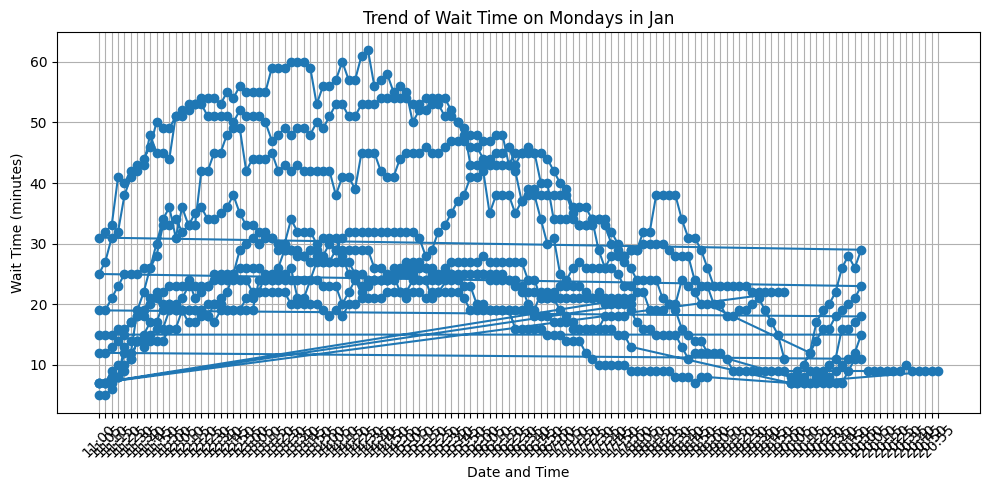

In [11]:
jan_monday = jan[jan['Day of Week'] == 'Monday']

# Set the DateTime column as the index
jan_monday.set_index('Date/Time', inplace=True)

# Plotting the Wait Time
plt.figure(figsize=(10, 5))
plt.plot(jan_monday['Time'], jan_monday['Wait Time'], marker='o')

# Adding titles and labels
plt.title('Trend of Wait Time on Mondays in Jan')
plt.xlabel('Date and Time')
plt.ylabel('Wait Time (minutes)')
plt.xticks(rotation=45)
plt.grid()

# Show the plot
plt.tight_layout()  # Adjust layout for better viewing
plt.show()

In [15]:
# Group by Time and calculate average Waiting Time
average_wait_time = jan_monday.groupby(jan_monday['Date/Time'].dt.time).agg({'Wait Time': 'mean'}).reset_index()

# Rename the columns for clarity
average_wait_time.rename(columns={'Date/Time': 'Time', 'Wait Time': 'Average Wait Time'}, inplace=True)

# Merge the average wait time back into the original jan_monday DataFrame
jan_monday = jan_monday.merge(average_wait_time, on='Time', how='left')

# Display the resulting DataFrame
print(jan_monday[['Date/Time', 'Time', 'Wait Time', 'Average Wait Time']])


KeyError: 'Date/Time'

In [ ]:

#############
# # Set the DateTime column as the index
# jan.set_index('Date/Time', inplace=True)

# # Plotting the Wait Time
# plt.figure(figsize=(10, 5))
# plt.plot(jan['Time'], jan['Wait Time'], marker='o')

# # Adding titles and labels
# plt.title('Trend of Wait Time in Jan')
# plt.xlabel('Date and Time')
# plt.ylabel('Wait Time (minutes)')
# plt.xticks(rotation=45)
# plt.grid()

# # Show the plot
# plt.tight_layout()  # Adjust layout for better viewing
# plt.show()

########